# Laboratorio 3
## Data Science
Javier Ovalle 22103

José Ángel Morales 22689

Ricardo Morales 22289

Link del repositorio: https://github.com/Saiyan-Javi/Laboratorio-3

In [41]:
#pip install kagglehub

In [42]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("agungpambudi/mnist-multiple-dataset-comprehensive-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Javier Chiquin\.cache\kagglehub\datasets\agungpambudi\mnist-multiple-dataset-comprehensive-analysis\versions\3


In [43]:
#import opendatasets as od # no para python 3.13
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops

Modalidad m0:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)

Modalidad m1:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)

Modalidad m2:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)

Modalidad m3:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)

Modalidad m4:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)



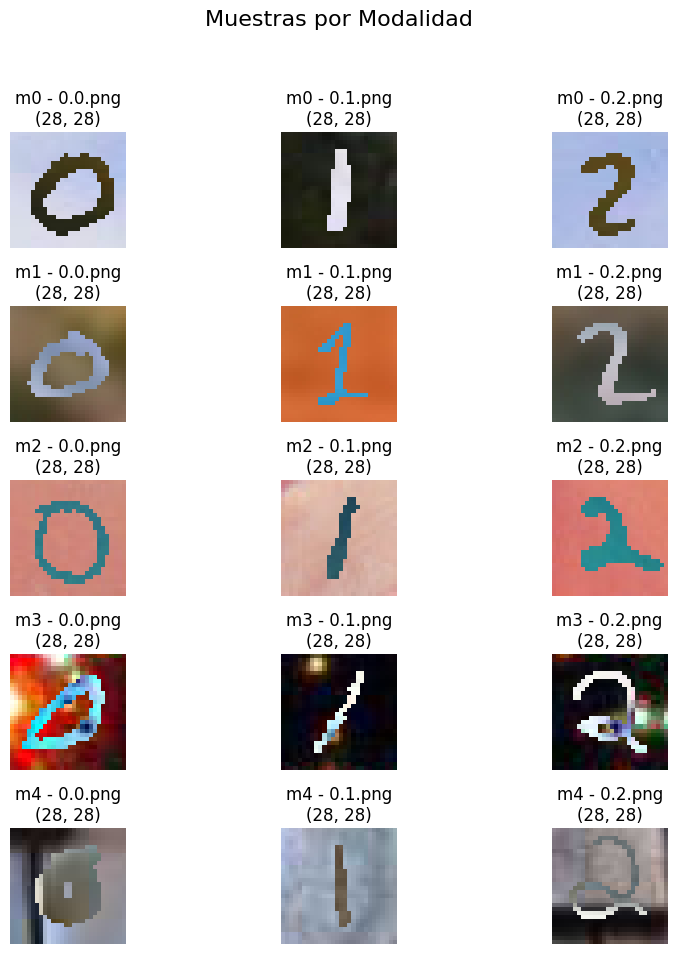

Distribución del dataset:
m0: 60000 imágenes
m1: 60000 imágenes
m2: 60000 imágenes
m3: 60000 imágenes
m4: 60000 imágenes

El dataset está balanceado (diferencia menor al 5%)


In [44]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Ruta base donde están las carpetas m0, m1, ..., m4
base_dir = "C:\\Users\\Javier Chiquin\\.cache\\kagglehub\\datasets\\agungpambudi\\mnist-multiple-dataset-comprehensive-analysis\\versions\\3\\PolyMNIST\\MMNIST\\train"
modalidades = ['m0', 'm1', 'm2', 'm3', 'm4']

resumen = {}

# Conteo y resolución
for mod in modalidades:
    mod_path = os.path.join(base_dir, mod)
    images = sorted([f for f in os.listdir(mod_path) if f.endswith(".png")])
    resumen[mod] = len(images)
    
    # Mostrar resolución de una imagen de ejemplo
    img_path = os.path.join(mod_path, images[0])
    img = Image.open(img_path)
    print(f"Modalidad {mod}:")
    print(f"  Total de imágenes: {len(images)}")
    print(f"  Tamaño de ejemplo: {img.size}")
    print("")

# Visualización de 3 imágenes por modalidad
fig, axes = plt.subplots(len(modalidades), 3, figsize=(9, 10))
fig.suptitle('Muestras por Modalidad', fontsize=16)

for i, mod in enumerate(modalidades):
    mod_path = os.path.join(base_dir, mod)
    images = sorted([f for f in os.listdir(mod_path) if f.endswith(".png")])
    
    for j in range(3):
        img = Image.open(os.path.join(mod_path, images[j]))
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(f"{mod} - {images[j]}\n{img.size}")
        axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Verificar balanceo
print("Distribución del dataset:")
for mod in modalidades:
    print(f"{mod}: {resumen[mod]} imágenes")

min_val = min(resumen.values())
max_val = max(resumen.values())
if max_val - min_val <= 0.05 * max_val:
    print("\nEl dataset está balanceado (diferencia menor al 5%)")
else:
    print("\nEl dataset no está completamente balanceado")


Se puede observar que las imágenes tienen una calidad bastante mala, sin embargo tambien se encuentran imágenes decentes, además se puede notar que todas las imágenes tienen la misma dimensión 28x28.


In [45]:
folder = "C:\\Users\\Javier Chiquin\\.cache\\kagglehub\\datasets\\agungpambudi\\mnist-multiple-dataset-comprehensive-analysis\\versions\\3\\PolyMNIST\\MMNIST\\"
subdirs = ['train/', 'test/']
labeldirs = ['m0/', 'm1/', 'm2/', 'm3/', 'm4/']

In [46]:
modelo1 = keras.Sequential()
modelo1.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
modelo1.add(keras.layers.MaxPooling2D((2,2)))
modelo1.add(keras.layers.Flatten())
modelo1.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo1.add(keras.layers.Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    40,960,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,961,153 (156.25 MB)

 Trainable params: 40,961,153 (156.25 MB)

 Non-trainable params: 0 (0.00 B)

Se entrena el modelo

In [40]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = datagen.flow_from_directory(folder+"train/", class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(folder+"test/", class_mode='binary', batch_size=64, target_size=(200, 200))
history = modelo1.fit(train_it, steps_per_epoch=train_it.samples//train_it.batch_size,validation_data=test_it, validation_steps=test_it.samples//test_it.batch_size,epochs = 5,verbose = True )
#modelo1.save(folder+'modelo1.keras')

Found 300000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.


c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4687/4687 ━━━━━━━━━━━━━━━━━━━━ 1786s 381ms/step - accuracy: 0.1992 - loss: nan - val_accuracy: 0.2000 - val_loss: nan
Epoch 2/5
   1/4687 ━━━━━━━━━━━━━━━━━━━━ 26:29 339ms/step - accuracy: 0.1406 - loss: nan

c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4687/4687 ━━━━━━━━━━━━━━━━━━━━ 81s 17ms/step - accuracy: 0.1406 - loss: nan - val_accuracy: 0.2000 - val_loss: nan
Epoch 3/5
4687/4687 ━━━━━━━━━━━━━━━━━━━━ 1750s 373ms/step - accuracy: 0.2008 - loss: nan - val_accuracy: 0.2000 - val_loss: nan
Epoch 4/5
4687/4687 ━━━━━━━━━━━━━━━━━━━━ 77s 16ms/step - accuracy: 0.1562 - loss: nan - val_accuracy: 0.2000 - val_loss: nan
Epoch 5/5
4687/4687 ━━━━━━━━━━━━━━━━━━━━ 1765s 377ms/step - accuracy: 0.1996 - loss: nan - val_accuracy: 0.2000 - val_loss: nan


#### Validamos resultados

In [47]:
loss , acc = modelo1.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.1997 - loss: -0.4635
> 19.956


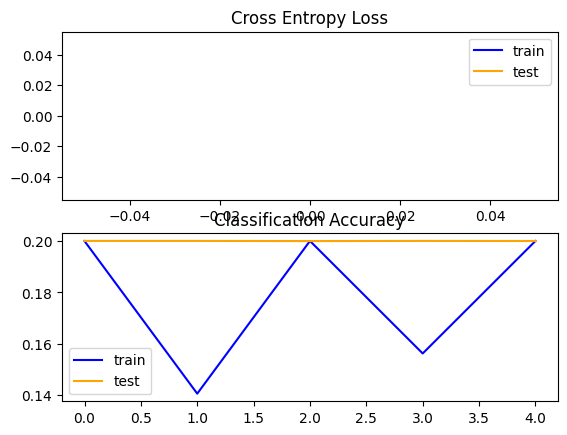

In [48]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()


### Arquitecturas
Usemos una arquitectura VGG de 2 bloques y veamos que sucede

In [49]:
modelo2 = keras.Sequential()
modelo2.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
modelo2.add(keras.layers.MaxPooling2D((2,2)))
modelo2.add(keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
modelo2.add(keras.layers.MaxPooling2D((2,2)))
modelo2.add(keras.layers.Flatten())
modelo2.add(keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
modelo2.add(keras.layers.Dense(1,activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,649 (78.20 MB)

 Trainable params: 20,499,649 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history2 = modelo2.fit(
    train_it,
    steps_per_epoch=100,  # antes era train_it.samples // train_it.batch_size
    validation_data=test_it,
    validation_steps=25,  # puedes ajustar a 20, 25 o 30
    epochs=5,
    verbose=True
)


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 587ms/step - accuracy: 0.2032 - loss: nan - val_accuracy: 0.2075 - val_loss: nan
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 556ms/step - accuracy: 0.1961 - loss: nan - val_accuracy: 0.2200 - val_loss: nan
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 572ms/step - accuracy: 0.1968 - loss: nan - val_accuracy: 0.1819 - val_loss: nan
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 570ms/step - accuracy: 0.2022 - loss: nan - val_accuracy: 0.2013 - val_loss: nan
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 566ms/step - accuracy: 0.2044 - loss: nan - val_accuracy: 0.2075 - val_loss: nan


In [52]:
loss , acc = modelo2.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 132ms/step - accuracy: 0.2025 - loss: nan
> 20.000


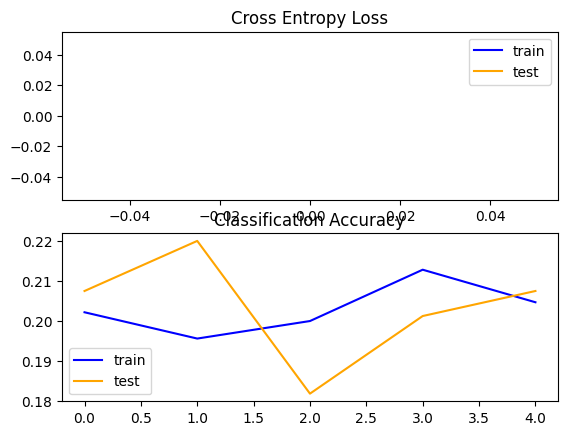

In [53]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='train')
plt.plot(history2.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['val_accuracy'], color='orange', label='test')
plt.legend()

En este modelo se puede botar una mejora bastante considerable a comparación del primer modelo, e incluso con una cantidad mucho menor de pasos 

#### Dropout

In [54]:
modelo3 = keras.Sequential()
modelo3.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
modelo3.add(keras.layers.MaxPooling2D((2,2)))
modelo3.add(keras.layers.Dropout(0.1))
modelo3.add(keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
modelo3.add(keras.layers.MaxPooling2D((2,2)))
modelo3.add(keras.layers.Dropout(0.1))
modelo3.add(keras.layers.Flatten())
modelo3.add(keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
modelo3.add(keras.layers.Dense(1,activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelo3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,649 (78.20 MB)

 Trainable params: 20,499,649 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history3 = modelo3.fit(
    train_it,
    steps_per_epoch=200,  # Ajusta según tu tiempo disponible
    validation_data=test_it,
    validation_steps=10,
    epochs=10,
    verbose=True
)
# modelo3.save(folder+'modelo3.keras')


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 124s 620ms/step - accuracy: 0.1960 - loss: nan - val_accuracy: 0.1937 - val_loss: nan
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 120s 601ms/step - accuracy: 0.2033 - loss: nan - val_accuracy: 0.1922 - val_loss: nan
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 120s 598ms/step - accuracy: 0.2041 - loss: nan - val_accuracy: 0.1828 - val_loss: nan
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 120s 600ms/step - accuracy: 0.1889 - loss: nan - val_accuracy: 0.2094 - val_loss: nan
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 120s 598ms/step - accuracy: 0.1925 - loss: nan - val_accuracy: 0.2047 - val_loss: nan
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 122s 611ms/step - accuracy: 0.1975 - loss: nan - val_accuracy: 0.1844 - val_loss: nan
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 125s 623ms/step - accuracy: 0.2050 - loss: nan - val_accuracy: 0.1859 - val_loss: nan
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 121s 605ms/step - accuracy: 0.1999 - loss: nan - val_accuracy: 0.2062 - val_lo

In [58]:
loss , acc = modelo3.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 148ms/step - accuracy: 0.2014 - loss: nan
> 20.000


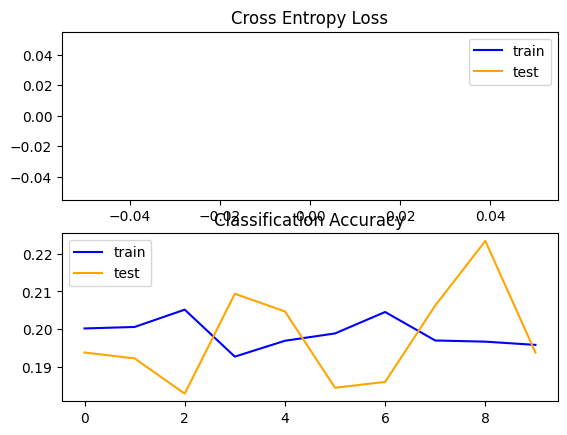

In [59]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history3.history['loss'], color='blue', label='train')
plt.plot(history3.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history3.history['accuracy'], color='blue', label='train')
plt.plot(history3.history['val_accuracy'], color='orange', label='test')
plt.legend()

Este modelo fue menos preciso que el de arquitecturas, sin embargo al final si se pudo llegar a lo mismo. 